In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import datasets,layers,models

In [4]:
(X_train,Y_train),(x_test,y_test) = datasets.cifar10.load_data()

170498071/170498071 [==============================] - 11s 0us/step


In [5]:
X_train[:5]

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

In [7]:
X_train.shape

(50000, 32, 32, 3)

In [8]:
x_test.shape

(10000, 32, 32, 3)

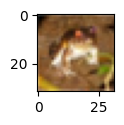

In [12]:
plt.figure(figsize=(1,1))
plt.imshow(X_train[0])

In [23]:
def plt_img(x,index):
  plt.figure(figsize=(1,1))
  plt.imshow(x[index])


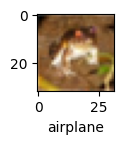

In [24]:
plt_img(X_train,0)

In [16]:
Y_train[:1]

array([[6]], dtype=uint8)

In [17]:
Y_train = Y_train.reshape(-1,)

In [18]:
Y_train[:3]

array([6, 9, 9], dtype=uint8)

In [20]:
classes= ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [25]:
classes[Y_train[0]]

'frog'

In [26]:
X_train = X_train/255
x_test = x_test/255

In [27]:
x_test[:2]

array([[[[0.61960784, 0.43921569, 0.19215686],
         [0.62352941, 0.43529412, 0.18431373],
         [0.64705882, 0.45490196, 0.2       ],
         ...,
         [0.5372549 , 0.37254902, 0.14117647],
         [0.49411765, 0.35686275, 0.14117647],
         [0.45490196, 0.33333333, 0.12941176]],

        [[0.59607843, 0.43921569, 0.2       ],
         [0.59215686, 0.43137255, 0.15686275],
         [0.62352941, 0.44705882, 0.17647059],
         ...,
         [0.53333333, 0.37254902, 0.12156863],
         [0.49019608, 0.35686275, 0.1254902 ],
         [0.46666667, 0.34509804, 0.13333333]],

        [[0.59215686, 0.43137255, 0.18431373],
         [0.59215686, 0.42745098, 0.12941176],
         [0.61960784, 0.43529412, 0.14117647],
         ...,
         [0.54509804, 0.38431373, 0.13333333],
         [0.50980392, 0.37254902, 0.13333333],
         [0.47058824, 0.34901961, 0.12941176]],

        ...,

        [[0.26666667, 0.48627451, 0.69411765],
         [0.16470588, 0.39215686, 0.58039216]

In [31]:
ann = models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(5000,activation='relu'),
    layers.Dense(3000,activation='relu'),
    layers.Dense(10,activation='sigmoid'),
])

In [32]:
ann.compile(optimizer='SGD',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [33]:
ann.fit(X_train,Y_train)

1563/1563 [==============================] - 479s 305ms/step - loss: 1.7993 - accuracy: 0.3597


In [34]:
from sklearn.metrics import confusion_matrix,classification_report
y_pred = ann.predict(x_test)

y_pred_classes = [np.argmax(y) for y in y_pred]
print('Classification : ',classification_report(y_test,y_pred_classes))

313/313 [==============================] - 23s 73ms/step
Classification :                precision    recall  f1-score   support

           0       0.53      0.42      0.47      1000
           1       0.58      0.41      0.48      1000
           2       0.30      0.24      0.27      1000
           3       0.36      0.22      0.27      1000
           4       0.26      0.63      0.37      1000
           5       0.43      0.25      0.32      1000
           6       0.46      0.44      0.45      1000
           7       0.50      0.38      0.43      1000
           8       0.45      0.67      0.54      1000
           9       0.51      0.47      0.49      1000

    accuracy                           0.41     10000
   macro avg       0.44      0.41      0.41     10000
weighted avg       0.44      0.41      0.41     10000



In [41]:
cnn = models.Sequential([
    layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(10,activation='softmax'),
])

In [42]:
cnn.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [43]:
cnn.fit(X_train,Y_train,epochs=10)

Epoch 1/10
1563/1563 [==============================] - 74s 47ms/step - loss: 1.4638 - accuracy: 0.4723
Epoch 2/10
1563/1563 [==============================] - 75s 48ms/step - loss: 1.1168 - accuracy: 0.6101
Epoch 3/10
1563/1563 [==============================] - 74s 48ms/step - loss: 0.9844 - accuracy: 0.6593
Epoch 4/10
1563/1563 [==============================] - 73s 47ms/step - loss: 0.9021 - accuracy: 0.6886
Epoch 5/10
1563/1563 [==============================] - 75s 48ms/step - loss: 0.8350 - accuracy: 0.7102
Epoch 6/10
1563/1563 [==============================] - 74s 48ms/step - loss: 0.7837 - accuracy: 0.7294
Epoch 7/10
1563/1563 [==============================] - 74s 47ms/step - loss: 0.7371 - accuracy: 0.7447
Epoch 8/10
1563/1563 [==============================] - 74s 47ms/step - loss: 0.6968 - accuracy: 0.7578
Epoch 9/10
1563/1563 [==============================] - 73s 47ms/step - loss: 0.6557 - accuracy: 0.7729
Epoch 10/10
1563/1563 [==============================] - 75s 48m

In [44]:
y_pred1 =cnn.predict(x_test)

313/313 [==============================] - 6s 19ms/step


In [45]:
y_pred1[:5]

array([[1.20191940e-03, 1.07986285e-04, 2.88260722e-04, 8.69007707e-01,
        1.93462300e-04, 8.86938255e-03, 1.33441770e-02, 4.30232649e-05,
        1.05192810e-01, 1.75134104e-03],
       [9.30397655e-05, 6.60316582e-05, 5.97548677e-08, 1.69923045e-08,
        1.31398039e-08, 2.48521959e-09, 1.85281304e-10, 4.29067670e-09,
        9.99839306e-01, 1.58124908e-06],
       [2.56855246e-02, 1.08155981e-01, 1.32349858e-04, 1.78638159e-03,
        6.36145356e-04, 3.28879192e-04, 1.24420389e-04, 2.82082619e-04,
        8.51685405e-01, 1.11828791e-02],
       [8.95952702e-01, 6.49603666e-04, 1.66117516e-03, 2.80573382e-04,
        1.89703831e-03, 4.55556710e-06, 3.16459802e-04, 7.89663773e-06,
        9.91842225e-02, 4.57404058e-05],
       [6.13481796e-04, 2.76637638e-06, 1.32445425e-01, 6.04412891e-03,
        3.16735618e-02, 7.79538881e-04, 8.28410625e-01, 9.75524472e-07,
        2.86849099e-05, 8.42991028e-07]], dtype=float32)

In [46]:
y_pred_class1 = [np.argmax(ele) for ele in y_pred1]

In [48]:
print('Classification Report : \n', classification_report(y_test,y_pred_class1))

Classification Report : 
               precision    recall  f1-score   support

           0       0.64      0.78      0.70      1000
           1       0.85      0.77      0.81      1000
           2       0.61      0.61      0.61      1000
           3       0.57      0.44      0.50      1000
           4       0.70      0.63      0.66      1000
           5       0.64      0.57      0.60      1000
           6       0.75      0.82      0.78      1000
           7       0.78      0.74      0.76      1000
           8       0.68      0.89      0.77      1000
           9       0.79      0.78      0.78      1000

    accuracy                           0.70     10000
   macro avg       0.70      0.70      0.70     10000
weighted avg       0.70      0.70      0.70     10000



In [50]:
cm = confusion_matrix(y_test,y_pred_class1)
cm

array([[783,  13,  27,  10,   8,   5,   7,   3, 114,  30],
       [ 46, 768,   4,   5,   2,   3,   8,   0,  82,  82],
       [100,   9, 609,  40,  74,  48,  58,  32,  22,   8],
       [ 63,   8,  87, 443,  59, 158,  81,  36,  51,  14],
       [ 42,   3,  72,  47, 626,  31,  74,  70,  25,  10],
       [ 36,   8,  79, 158,  38, 571,  29,  44,  21,  16],
       [ 11,   4,  50,  35,  28,  14, 817,   6,  26,   9],
       [ 33,   7,  45,  26,  48,  54,   5, 745,  13,  24],
       [ 61,  12,   7,   6,   1,   1,   5,   5, 885,  17],
       [ 53,  68,  11,   6,   4,   4,   7,  12,  57, 778]])

In [51]:
import seaborn as sn

Text(50.722222222222214, 0.5, 'True Values')

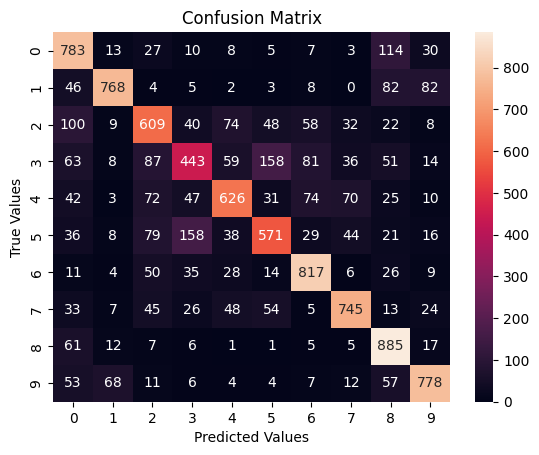

In [57]:
sn.heatmap(cm,annot=True,fmt="d")
plt.title("Confusion Matrix")
plt.xlabel('Predicted Values')
plt.ylabel('True Values')